# COVID-19 

This is my new version of analyses of COVID-19.  

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from pathlib import Path
import numpy as np
import pandas as pd
import datetime
import time

# Canada

In [2]:
from src.phac import PHAC


can = PHAC()
as_of = "2020-08-22"

## Total Cases

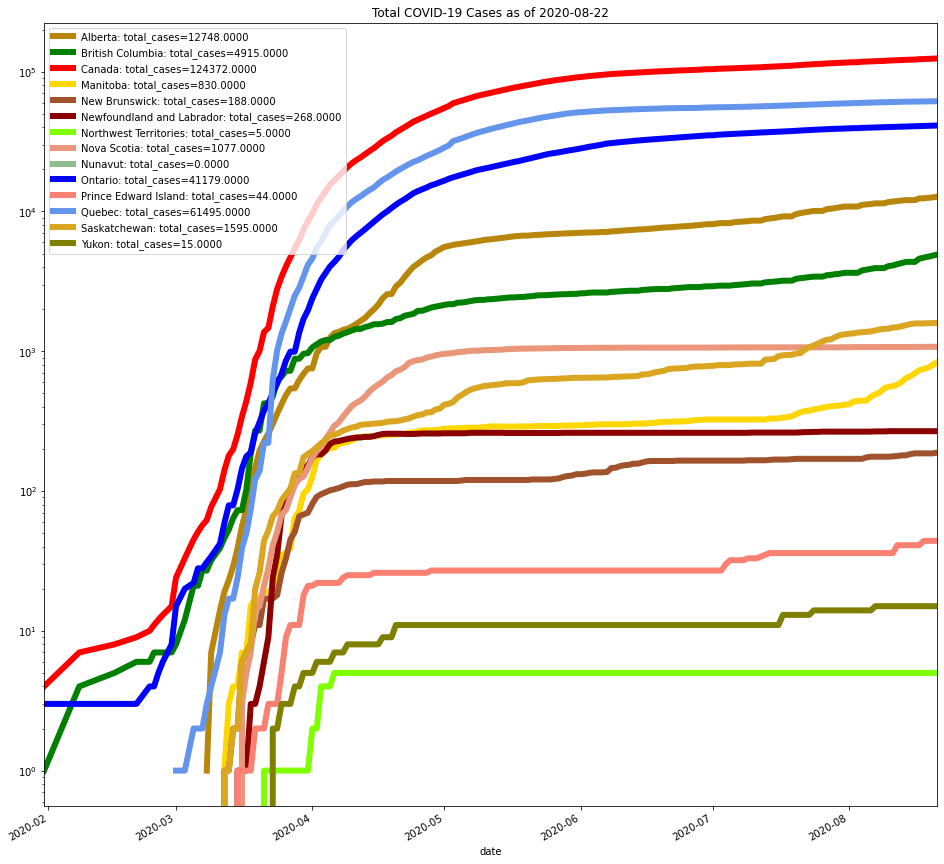

In [3]:
can_tc_fig = can.plot_var("total_cases", *can.provinces,
    figsize=(16,16),
    log_scale=True,
    colours=can.prov_colours,
    #date_start="2020-03-01",
    lw=6,
    title=f"Total COVID-19 Cases as of {as_of}"  
)


plt.show()

In [4]:
var_pivot = can.var_by_location("total_cases", *can.provinces)
var_pivot[-7:][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-08-15,121889.0,268.0,41.0,1074.0,184.0,61084.0,40565.0,663.0,1566.0,12053.0,4358.0,15.0,5.0,0.0
2020-08-16,122087.0,268.0,41.0,1074.0,186.0,61151.0,40646.0,697.0,1580.0,12053.0,4358.0,15.0,5.0,0.0
2020-08-17,122872.0,268.0,41.0,1075.0,186.0,61206.0,40745.0,731.0,1581.0,12412.0,4594.0,15.0,5.0,0.0
2020-08-18,123154.0,268.0,44.0,1075.0,186.0,61252.0,40870.0,748.0,1582.0,12419.0,4677.0,15.0,5.0,0.0
2020-08-19,123490.0,268.0,44.0,1076.0,186.0,61316.0,40972.0,763.0,1586.0,12501.0,4745.0,15.0,5.0,0.0
2020-08-20,123873.0,268.0,44.0,1077.0,186.0,61402.0,41048.0,796.0,1590.0,12604.0,4825.0,15.0,5.0,0.0
2020-08-21,124372.0,268.0,44.0,1077.0,188.0,61495.0,41179.0,830.0,1595.0,12748.0,4915.0,15.0,5.0,0.0


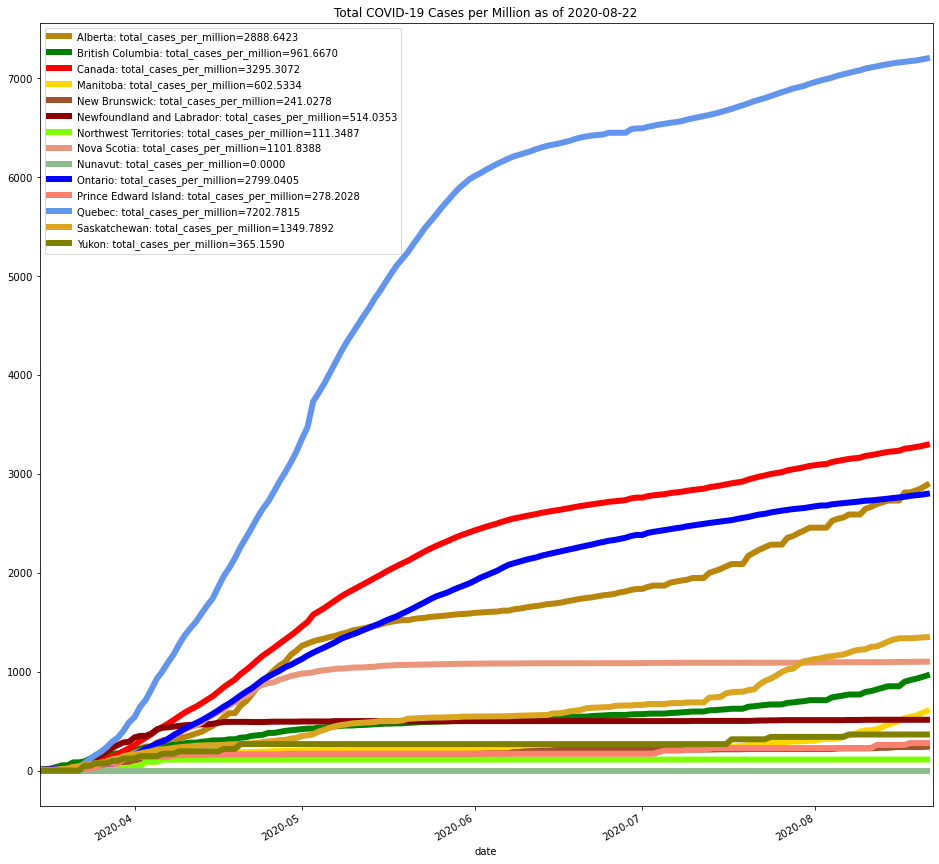

In [5]:
can_tcpm_fig = can.plot_var("total_cases_per_million", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-15",
    date_end=as_of,
    lw=6,
    title=f"Total COVID-19 Cases per Million as of {as_of}"  
)


plt.show()

## New cases

In [6]:
can.prov_colours

{'Canada': 'r',
 'Newfoundland and Labrador': 'darkred',
 'Prince Edward Island': 'salmon',
 'Nova Scotia': 'darksalmon',
 'New Brunswick': 'sienna',
 'Quebec': 'cornflowerblue',
 'Ontario': 'b',
 'Manitoba': 'gold',
 'Saskatchewan': 'goldenrod',
 'Alberta': 'darkgoldenrod',
 'British Columbia': 'g',
 'Yukon': 'olive',
 'Northwest Territories': 'chartreuse',
 'Nunavut': 'darkseagreen'}

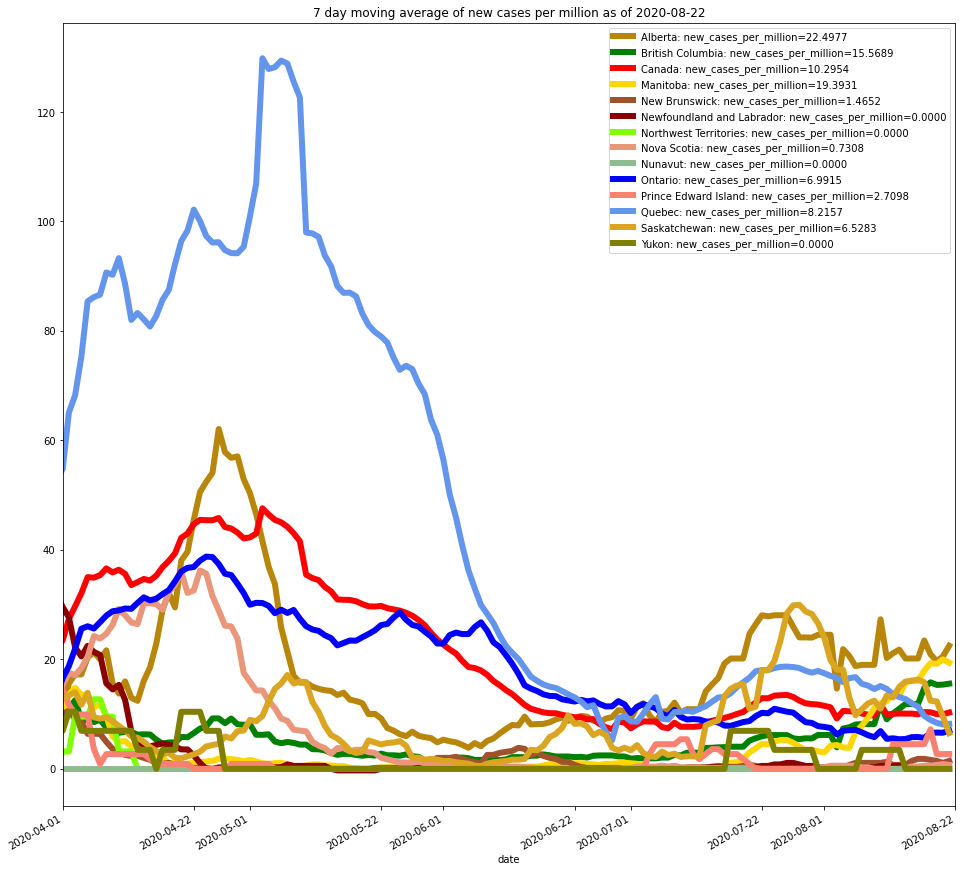

In [7]:
ma_win = 7
can_nc_fig = can.plot_var("new_cases_per_million", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-04-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new cases per million as of {as_of}"                     
)

savefile = f"{as_of}_COVID-19_NCperMil_{ma_win}_days.png"
plt.savefig(Path.home().joinpath("Downloads/" + savefile),
           format="png")

plt.show()

In [8]:
can_nc = can.var_by_location("new_cases", *can.provinces)
can_nc[-7:][can.provinces]

location,Canada,Newfoundland and Labrador,Prince Edward Island,Nova Scotia,New Brunswick,Quebec,Ontario,Manitoba,Saskatchewan,Alberta,British Columbia,Yukon,Northwest Territories,Nunavut
date,,,,,,,,,,,,,,
2020-08-15,237.0,0.0,0.0,2.0,4.0,80.0,106.0,20.0,25.0,0.0,0.0,0.0,0.0,0.0
2020-08-16,198.0,0.0,0.0,0.0,2.0,67.0,81.0,34.0,14.0,0.0,0.0,0.0,0.0,0.0
2020-08-17,785.0,0.0,0.0,1.0,0.0,55.0,99.0,34.0,1.0,359.0,236.0,0.0,0.0,0.0
2020-08-18,282.0,0.0,3.0,0.0,0.0,46.0,125.0,17.0,1.0,7.0,83.0,0.0,0.0,0.0
2020-08-19,336.0,0.0,0.0,1.0,0.0,64.0,102.0,15.0,4.0,82.0,68.0,0.0,0.0,0.0
2020-08-20,383.0,0.0,0.0,1.0,0.0,86.0,76.0,33.0,4.0,103.0,80.0,0.0,0.0,0.0
2020-08-21,499.0,0.0,0.0,0.0,2.0,93.0,131.0,34.0,5.0,144.0,90.0,0.0,0.0,0.0


## Active Confirmed Cases

In [9]:
can.active_confirmed_cases(*can.provinces)[-7:]

location,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
date,,,,,,,,,,,,,,
2020-08-15,1210.0,717.0,5290.0,246.0,14.0,2.0,0.0,5.0,0.0,1232.0,5.0,1626.0,232.0,1.0
2020-08-16,1210.0,717.0,5203.0,262.0,16.0,2.0,0.0,3.0,0.0,1197.0,5.0,1552.0,238.0,1.0
2020-08-17,1569.0,953.0,5841.0,289.0,16.0,2.0,0.0,4.0,0.0,1296.0,5.0,1484.0,222.0,1.0
2020-08-18,1273.0,890.0,5362.0,305.0,16.0,2.0,0.0,4.0,0.0,1242.0,8.0,1407.0,214.0,1.0
2020-08-19,1261.0,911.0,5303.0,319.0,12.0,2.0,0.0,5.0,0.0,1258.0,8.0,1316.0,210.0,1.0
2020-08-20,1308.0,944.0,5312.0,322.0,10.0,2.0,0.0,6.0,0.0,1239.0,8.0,1269.0,203.0,1.0
2020-08-21,1318.0,981.0,5387.0,339.0,12.0,1.0,0.0,6.0,0.0,1282.0,8.0,1254.0,186.0,0.0


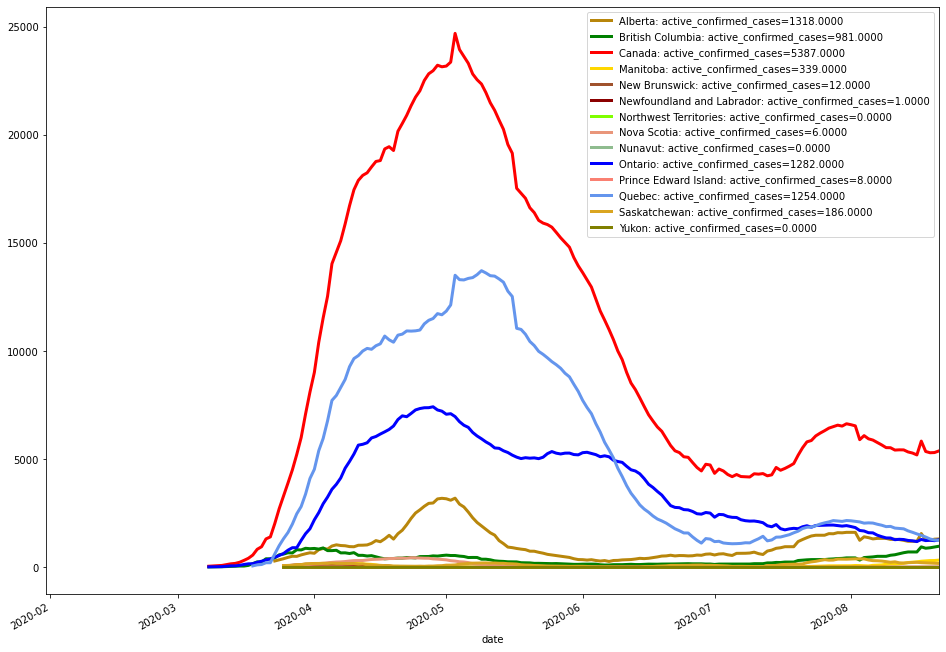

In [10]:
fig = can.plot_var("active_confirmed_cases", *can.provinces,
                   colours=can.prov_colours)

plt.show()

In [11]:
can.active_confirmed_cases(*can.provinces, percapita=True)[-7:]

location,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
date,,,,,,,,,,,,,,
2020-08-15,274.180822,140.287937,140.161571,178.582188,17.948879,3.836084,0.0,5.115315,0.0,83.742148,31.613956,190.449998,196.332974,24.343931
2020-08-16,274.180822,140.287937,137.856456,190.197290,20.513005,3.836084,0.0,3.069189,0.0,81.363110,31.613956,181.782532,201.410551,24.343931
2020-08-17,355.528686,186.463603,154.760630,209.797774,20.513005,3.836084,0.0,4.092252,0.0,88.092390,31.613956,173.817834,187.870346,24.343931
2020-08-18,288.456353,174.137048,142.069252,221.412875,20.513005,3.836084,0.0,4.092252,0.0,84.421874,50.582329,164.798984,181.100243,24.343931
2020-08-19,285.737204,178.245900,140.506013,231.576089,15.384753,3.836084,0.0,5.115315,0.0,85.509434,50.582329,154.140343,177.715192,24.343931
2020-08-20,296.387203,184.702667,140.744473,233.753921,12.820628,3.836084,0.0,6.138377,0.0,84.217956,50.582329,148.635331,171.791352,24.343931
2020-08-21,298.653160,191.942072,142.731641,246.094967,15.384753,1.918042,0.0,6.138377,0.0,87.140775,50.582329,146.878412,157.404884,0.000000


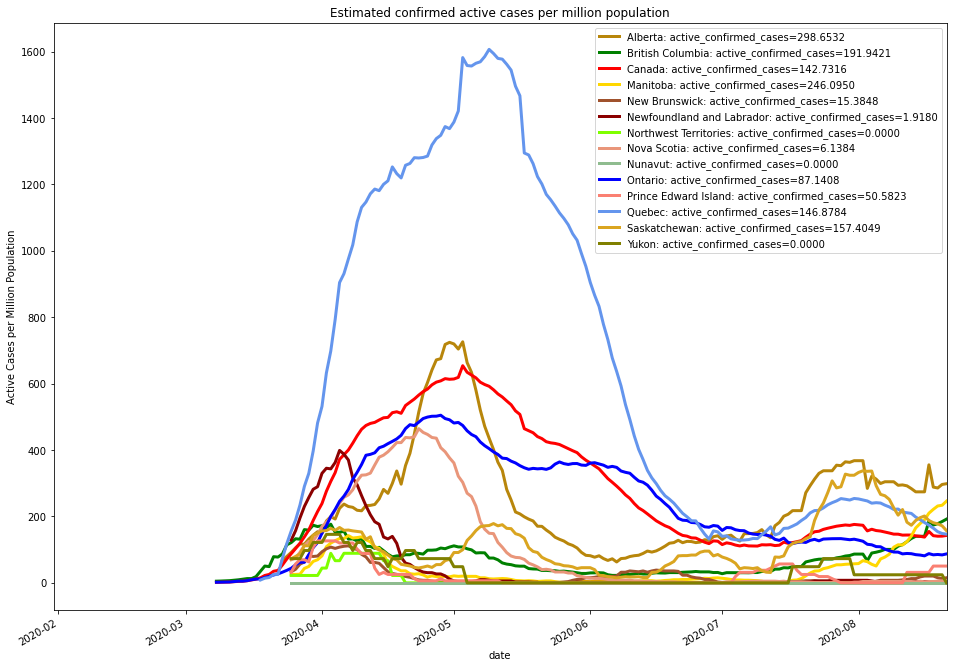

In [12]:
fig = can.plot_var("active_confirmed_cases", *can.provinces, percapita=True,
                   colours=can.prov_colours,
                  title=f"Estimated confirmed active cases per million population",
                  y_label="Active Cases per Million Population")

plt.show()

## Tests

In [13]:
ma_win = 28

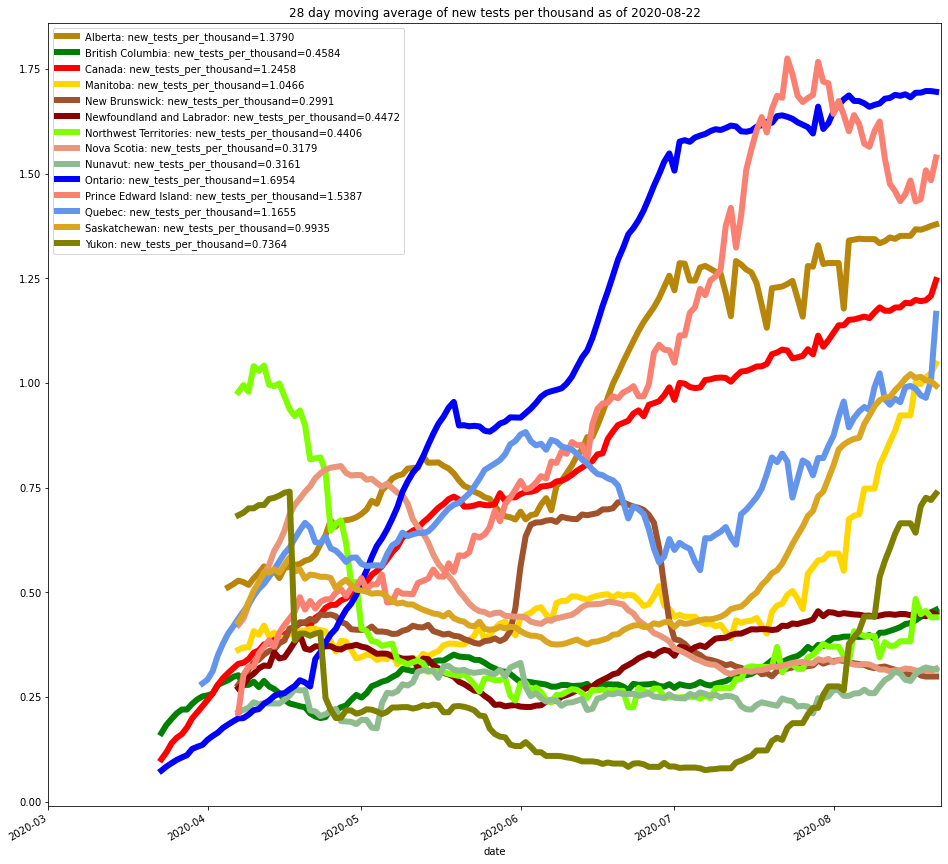

In [14]:

can_nt_fig = can.plot_var("new_tests_per_thousand", *can.provinces, ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"{ma_win} day moving average of new tests per thousand as of {as_of}"  
)


plt.show()

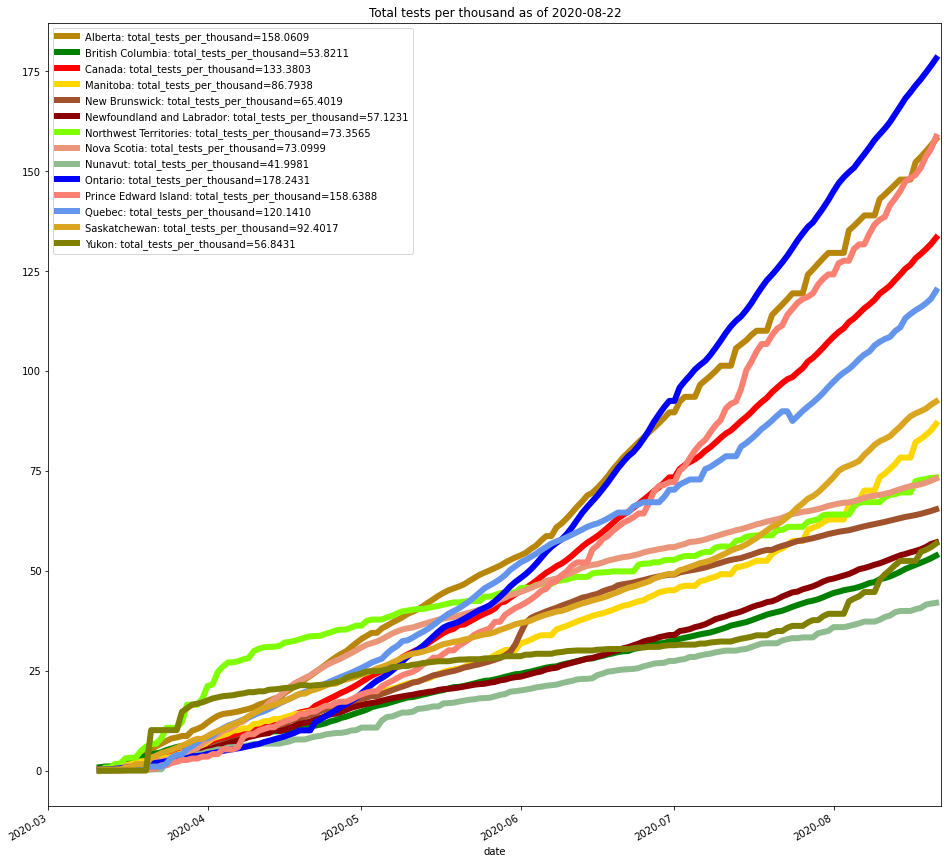

In [15]:
can_ttpt_fig = can.plot_var("total_tests_per_thousand", *can.provinces,
    figsize=(16,16),
    #log_scale=True,
    colours=can.prov_colours,
    date_start="2020-03-01",
    date_end=as_of,
    lw=6,
    title=f"Total tests per thousand as of {as_of}"  
)


plt.show()

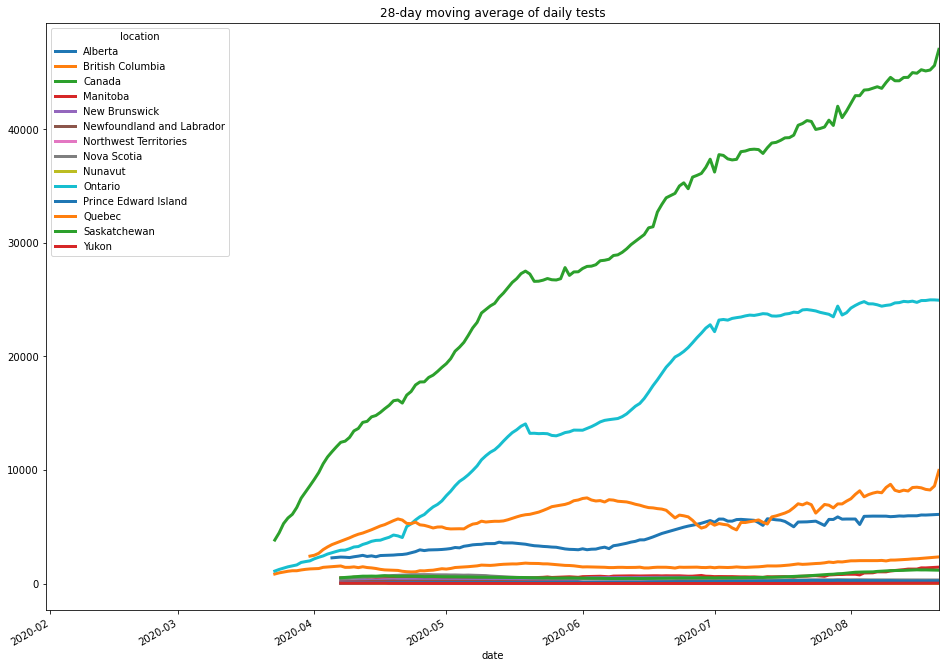

In [16]:
# Plot Daily Tests - Use Average over last ma_win days
ma_win = 28
locations = can.provinces

can_nt = can.var_by_location("new_tests", *locations).rolling(ma_win).mean()

start_date = can_nt.index[0]
end_date = can_nt.index[-1]

plot_properties = dict(
    figsize=(16,12),
    xlim=(start_date, end_date),
    logy=False,
    lw=3,
    #color=[can.prov_colours[loc] for loc in locations],
    title=f"{ma_win}-day moving average of daily tests",
)

fig = can_nt.plot(**plot_properties)

#legend_labels = [f"{loc}: Daily Tests={can_nt.to_dict()[loc][max(can_nt[:end_date].index)]:.4f}"
#                 for loc in sorted(locations)]
#plt.legend(legend_labels)

plt.show()

## Positive Test Rate

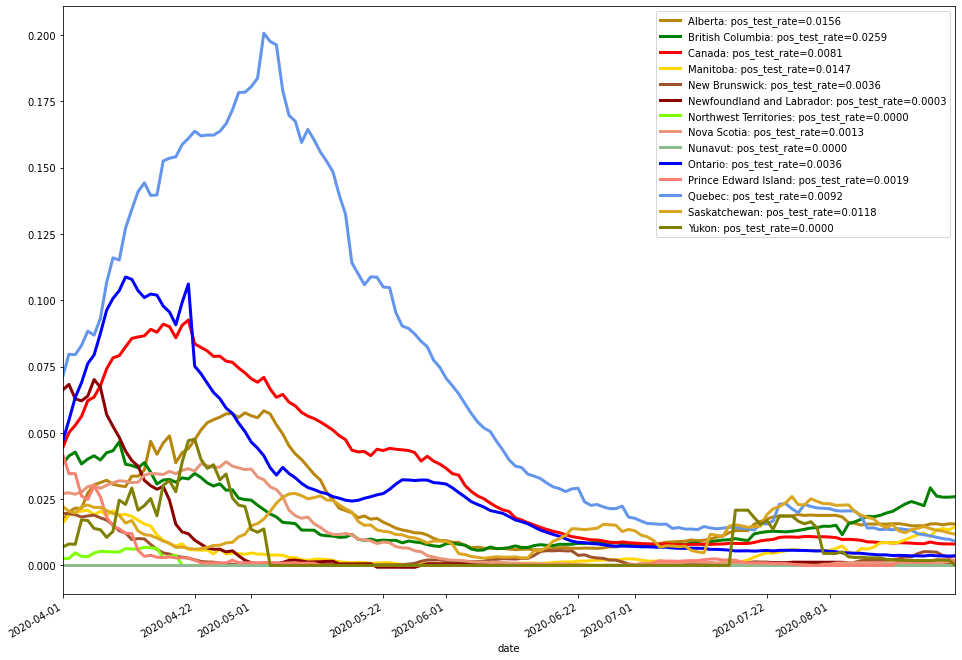

In [33]:
# Plot the positive test rate over the last ma_win days
ma_win = 14
locations = can.provinces

fig = can.plot_var("pos_test_rate", *can.provinces,
                   ma_window=ma_win,
                   date_start="2020-04-01",
                   colours=can.prov_colours)

plt.show()

<AxesSubplot:xlabel='date'>

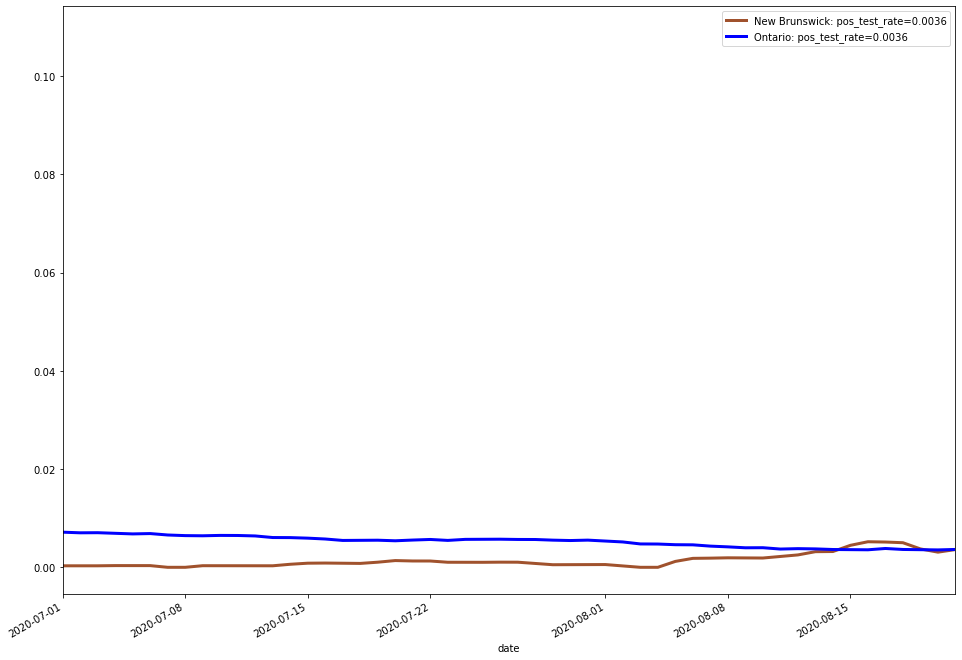

In [35]:
can.plot_var("pos_test_rate", "New Brunswick", "Ontario", ma_window=ma_win, 
             date_start="2020-07-01",
             colours=can.prov_colours)

In [21]:
def prob_exposure(group_size, ptr, isolation_compliance=0.8):
    return 1 - np.power(1 - ptr + isolation_compliance * ptr, group_size)

today = datetime.datetime.today().strftime('%Y-%m-%d')
group_sizes = {
    "British Columbia": [("2020-05-08", 50, 50), ("2020-06-23", 50, 50), (today, 50, 50)]
}

group_size = 50
can_pe = can_pt.apply(lambda ptr: prob_exposure(group_size, ptr))

can_pe[-7:]




location,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
date,,,,,,,,,,,,,,
2020-08-15,0.138985,0.208655,0.079111,0.108951,0.043789,0.006210,0.0,0.011802,0.0,0.035392,0.013533,0.113123,0.130956,0.018218
2020-08-16,0.138985,0.202199,0.078744,0.115619,0.050744,0.006196,0.0,0.006982,0.0,0.035050,0.014712,0.109430,0.136975,0.018218
2020-08-17,0.145020,0.254287,0.084542,0.102879,0.050187,0.006208,0.0,0.009413,0.0,0.037624,0.014600,0.105553,0.129548,0.018218
2020-08-18,0.145578,0.230682,0.079994,0.126186,0.048869,0.006173,0.0,0.009034,0.0,0.035693,0.021503,0.100936,0.124352,0.019534
2020-08-19,0.142272,0.227322,0.078079,0.129785,0.036763,0.006175,0.0,0.010954,0.0,0.035319,0.021708,0.096148,0.121495,0.019766
2020-08-20,0.145559,0.227479,0.077954,0.125846,0.030384,0.006066,0.0,0.012935,0.0,0.034820,0.020946,0.093844,0.115260,0.019573
2020-08-21,0.144907,0.228953,0.077666,0.137193,0.035533,0.002980,0.0,0.012652,0.0,0.035721,0.018612,0.087715,0.111180,0.000000


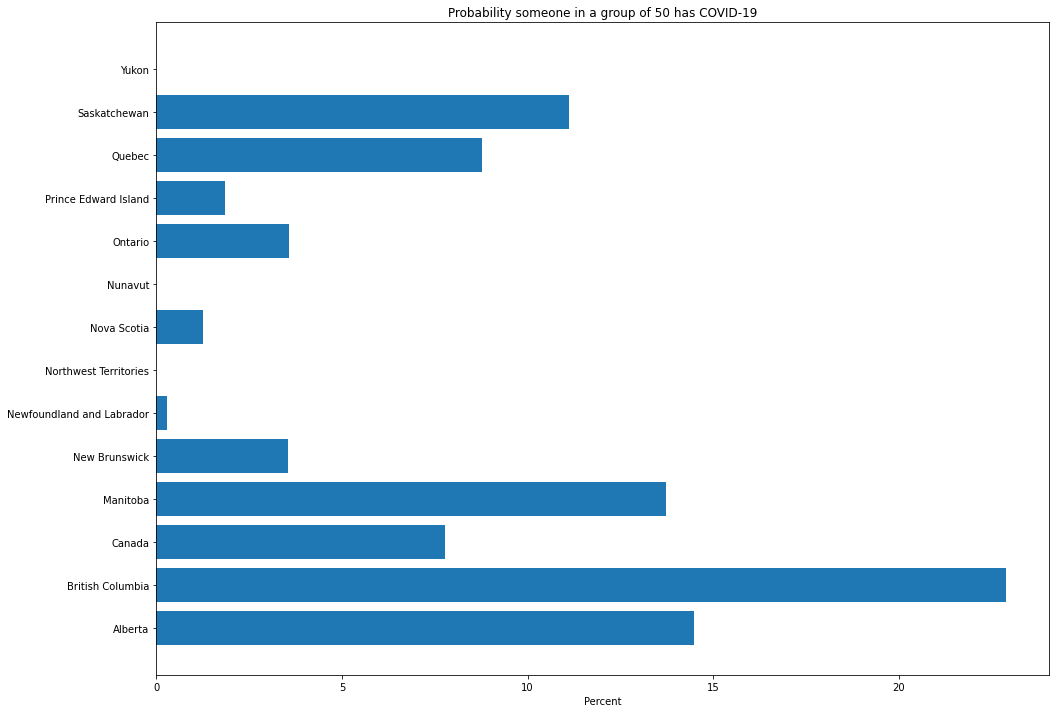

In [22]:
pe_fig, pe_ax = plt.subplots(figsize=(16,12))

pe_ax.barh(list(can_pe.columns), 100 * can_pe[-1:].values[0])
pe_ax.set_xlabel("Percent")
pe_ax.set_title(f"Probability someone in a group of {group_size} has COVID-19")

savefile = f"{as_of}_COVID-19_ProbExp_{group_size}.png"
plt.savefig(Path.home().joinpath("Downloads/" + savefile),
           format="png")

plt.show()

In [23]:
can.active_confirmed_cases(*can.provinces)[-7:]

location,Alberta,British Columbia,Canada,Manitoba,New Brunswick,Newfoundland and Labrador,Northwest Territories,Nova Scotia,Nunavut,Ontario,Prince Edward Island,Quebec,Saskatchewan,Yukon
date,,,,,,,,,,,,,,
2020-08-15,1210.0,717.0,5290.0,246.0,14.0,2.0,0.0,5.0,0.0,1232.0,5.0,1626.0,232.0,1.0
2020-08-16,1210.0,717.0,5203.0,262.0,16.0,2.0,0.0,3.0,0.0,1197.0,5.0,1552.0,238.0,1.0
2020-08-17,1569.0,953.0,5841.0,289.0,16.0,2.0,0.0,4.0,0.0,1296.0,5.0,1484.0,222.0,1.0
2020-08-18,1273.0,890.0,5362.0,305.0,16.0,2.0,0.0,4.0,0.0,1242.0,8.0,1407.0,214.0,1.0
2020-08-19,1261.0,911.0,5303.0,319.0,12.0,2.0,0.0,5.0,0.0,1258.0,8.0,1316.0,210.0,1.0
2020-08-20,1308.0,944.0,5312.0,322.0,10.0,2.0,0.0,6.0,0.0,1239.0,8.0,1269.0,203.0,1.0
2020-08-21,1318.0,981.0,5387.0,339.0,12.0,1.0,0.0,6.0,0.0,1282.0,8.0,1254.0,186.0,0.0


/Users/bill/IdeaProjects/covid-19/src/dataset.py:160: RuntimeWarning: invalid value encountered in power
  growth = lambda x: np.power(x, 1 / window)


<AxesSubplot:xlabel='date'>

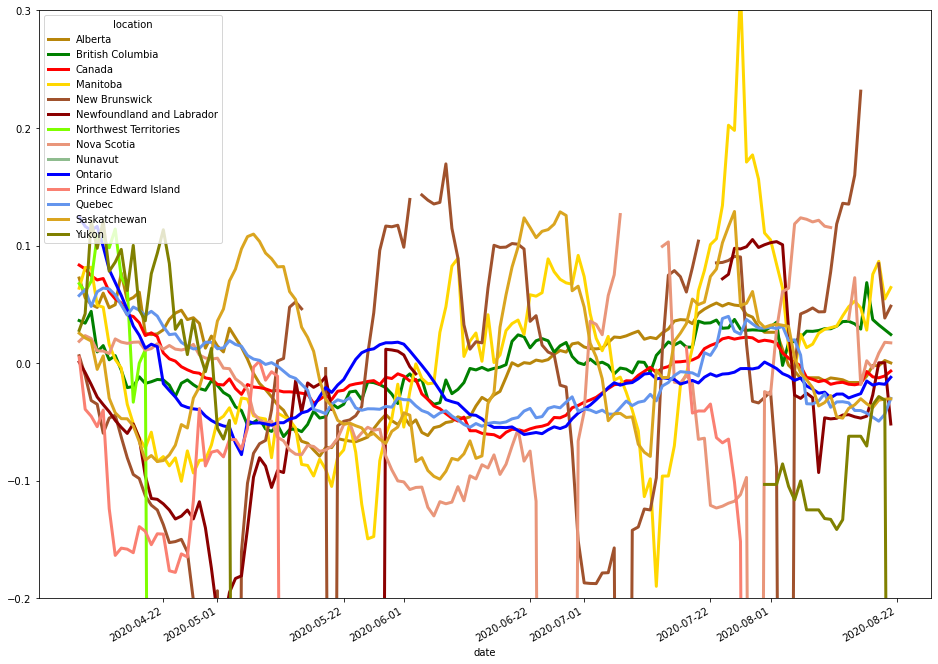

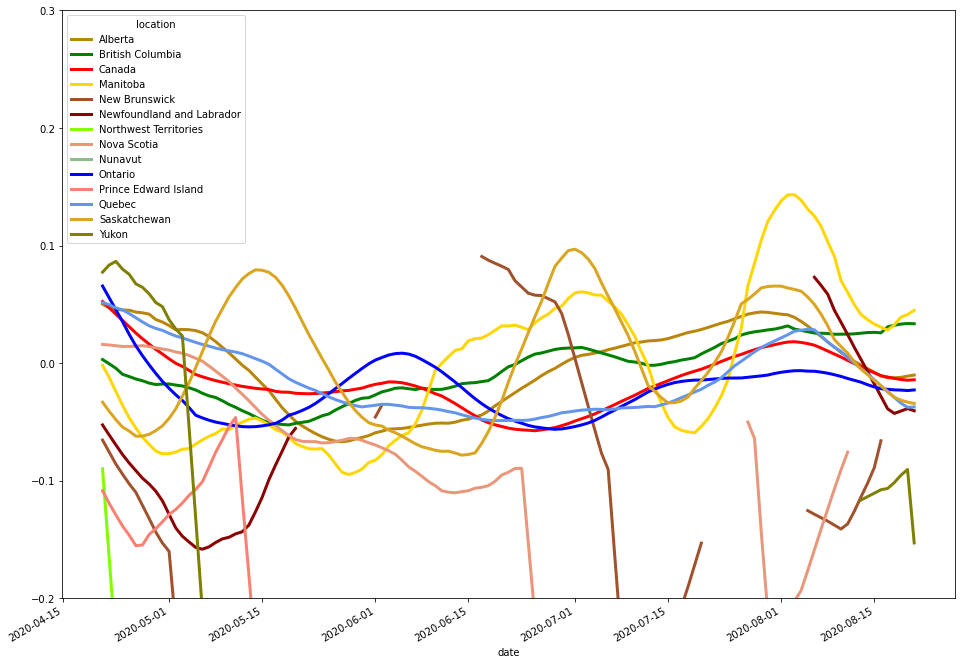

In [24]:
locations = can.provinces
pt_rate_growth = can.growth_rate("pos_test_rate", 14, *locations)

pt_rate_growth_ma = pt_rate_growth.rolling(14).mean()

pt_rate_growth.plot(
    figsize=(16,12),
    color=[can.prov_colours[loc] for loc in sorted(locations)],
    lw = 3,
    ylim=[-0.2,0.3]
)

pt_rate_growth_ma.plot(
    figsize=(16,12),
    color=[can.prov_colours[loc] for loc in sorted(locations)],
    lw = 3,
    ylim=[-0.2,0.3]
)

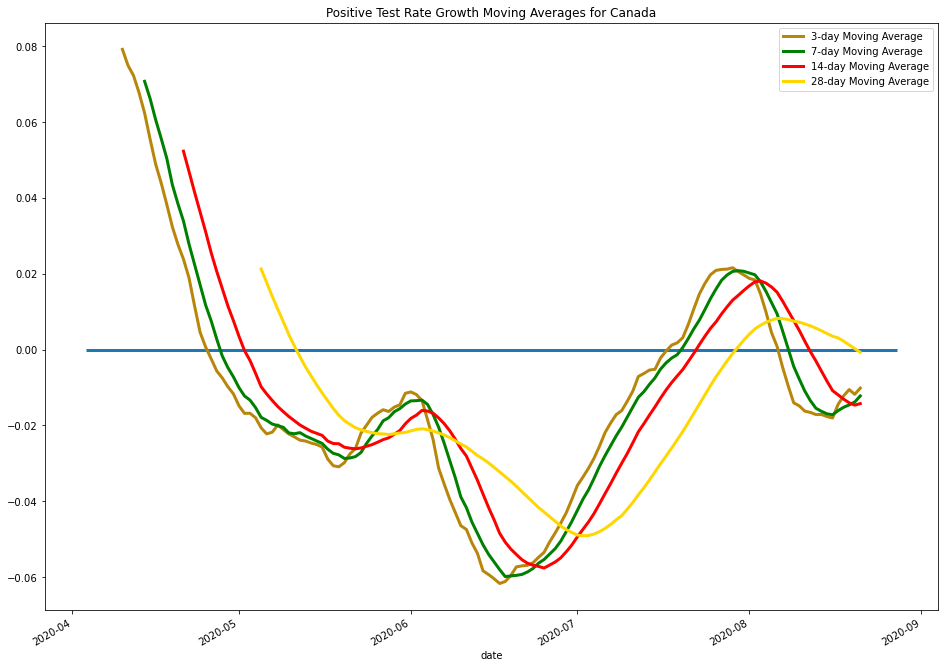

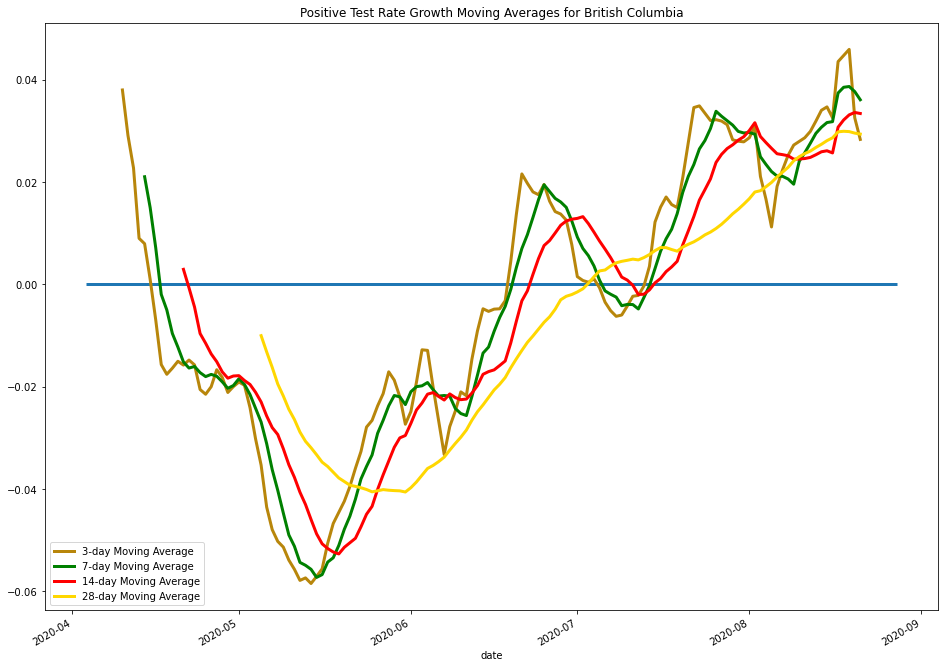

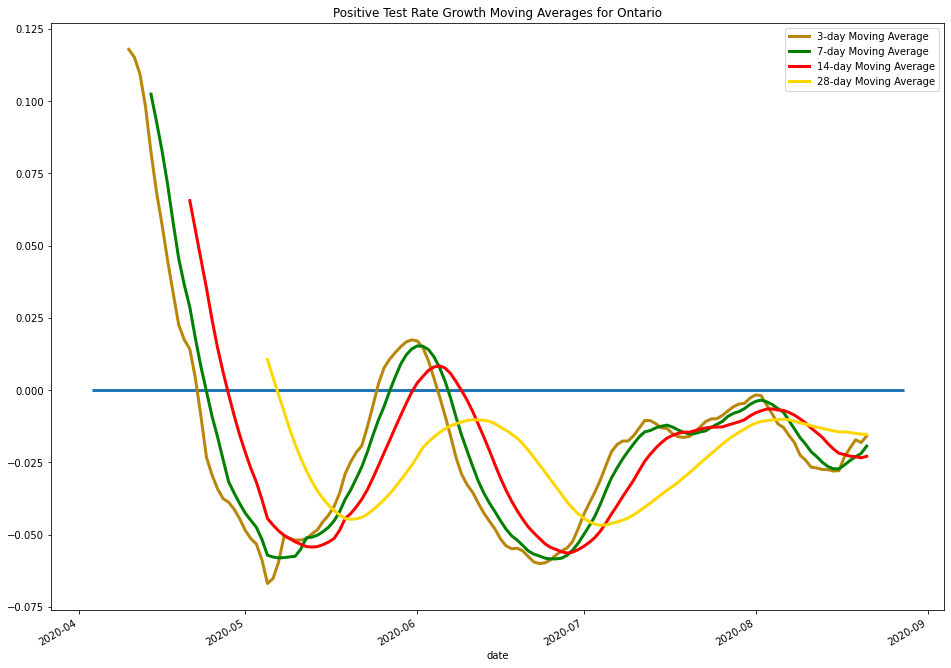

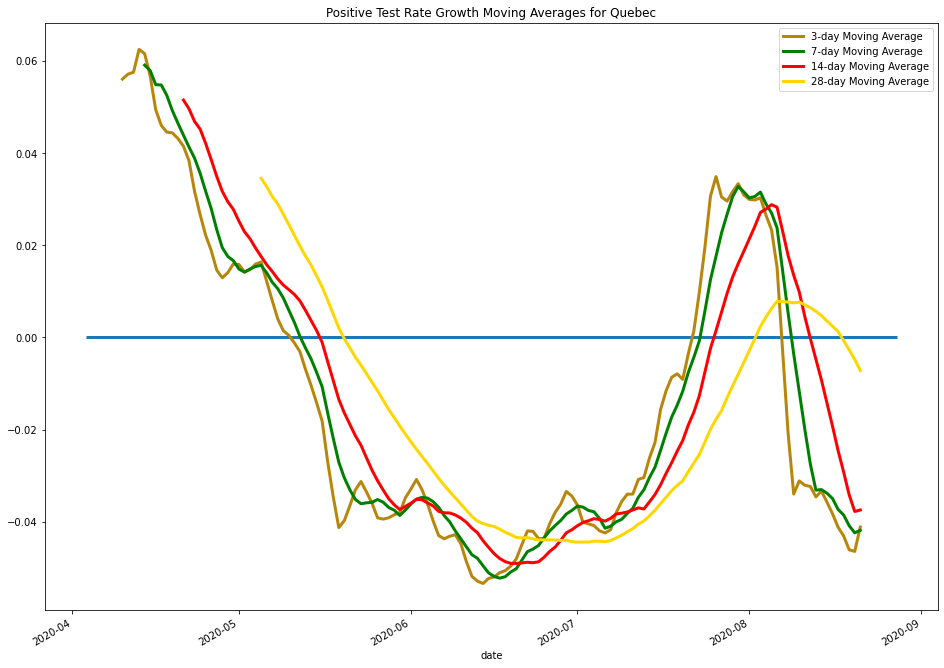

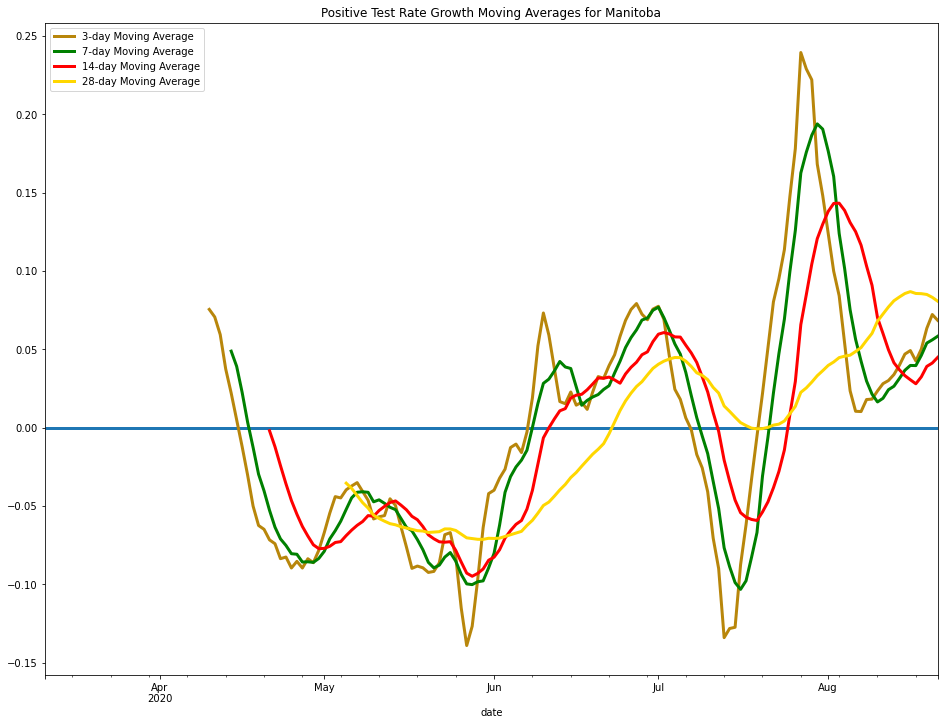

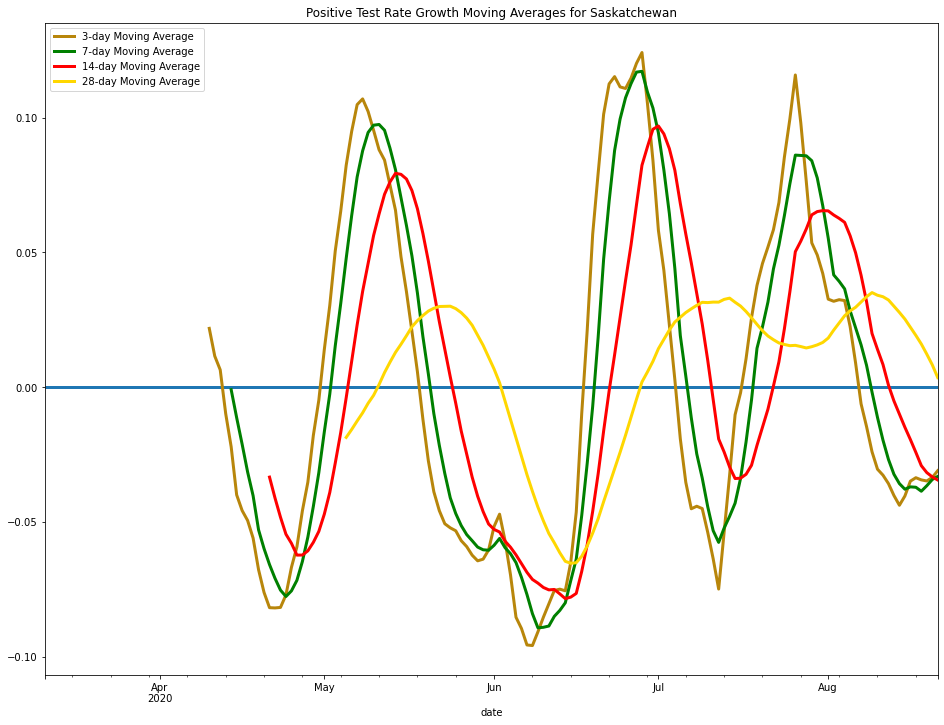

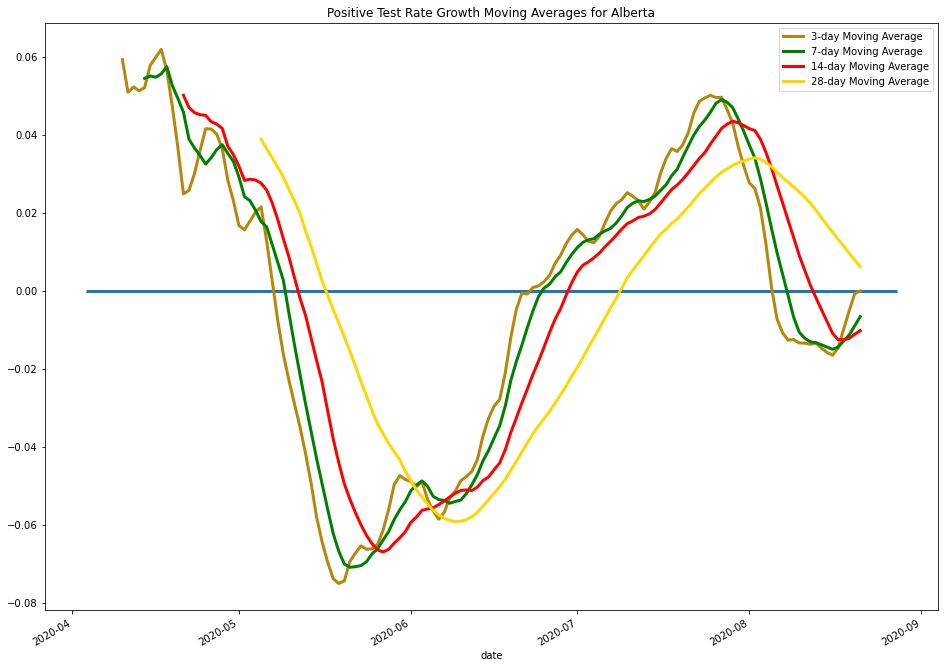

In [25]:
for location in (can.large_provinces + can.prairies):

    pt_rate_growth = can.growth_rate("pos_test_rate", 14, location)

    pt_rate_growth_ma = pd.DataFrame.from_dict(
        {f"{window}-day Moving Average": pt_rate_growth.rolling(window).mean()[location] 
         for window in [3,7, 14, 28]}
    )


    ax = pt_rate_growth_ma.plot(
        figsize=(16,12),
        color=[can.prov_colours[loc] for loc in sorted(locations)],
        lw = 3, 
        title=f"Positive Test Rate Growth Moving Averages for {location}"
    )
    
    ax.hlines(0, ax.get_xlim()[0], ax.get_xlim()[1], lw=3)
    
    
    savefile = f"{as_of}_PTGRMAs_{location}.png"
    plt.savefig(Path.home().joinpath("Downloads/" + savefile),
               format="png")


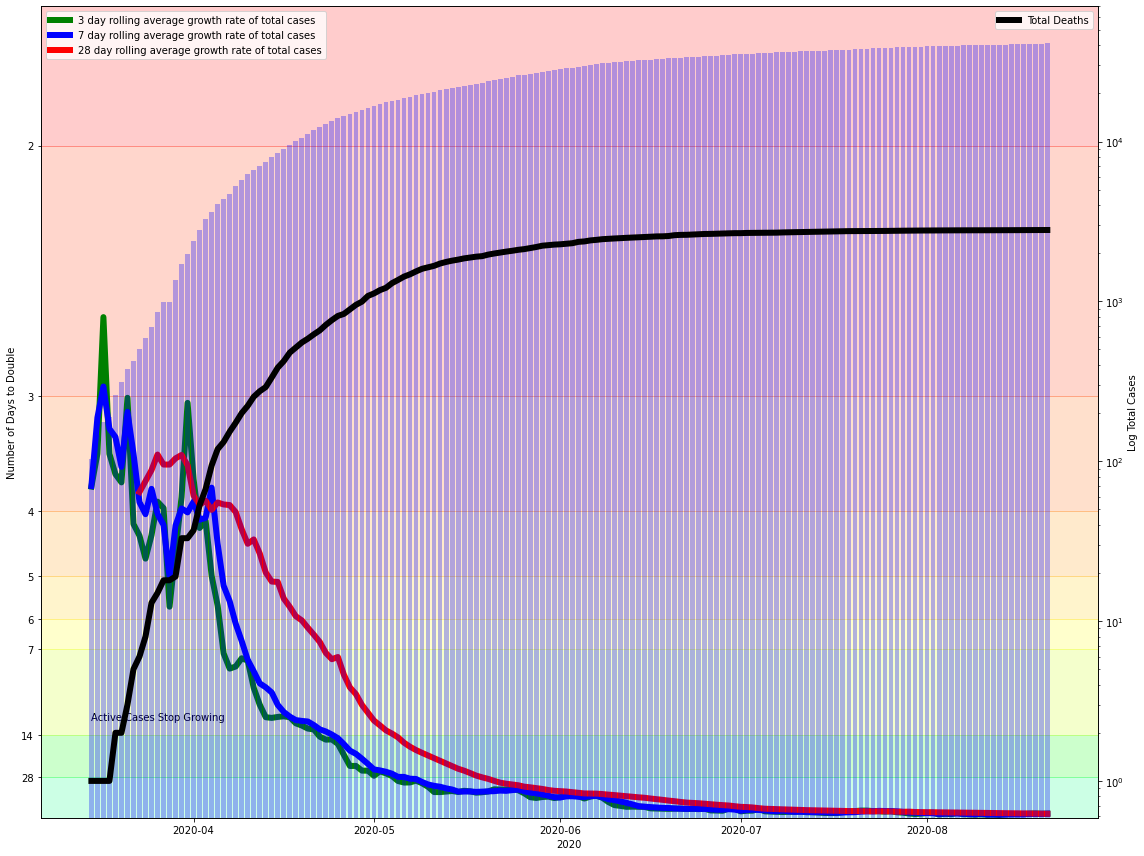

In [26]:
fig = can.plot_location('Ontario', from_date="2020-03-15")

plt.show()

# World

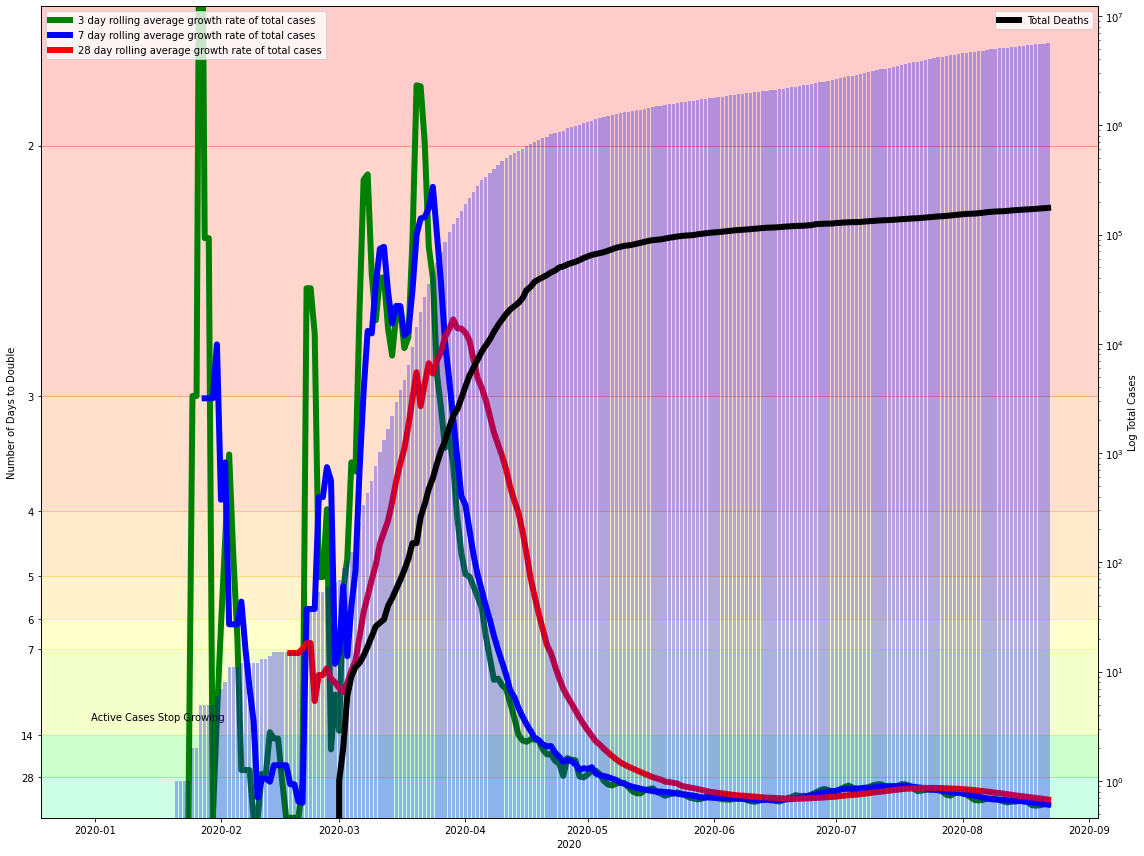

In [27]:
from src.ecdc import ECDC

world = ECDC()
fig = world.plot_location('United States')

plt.show()

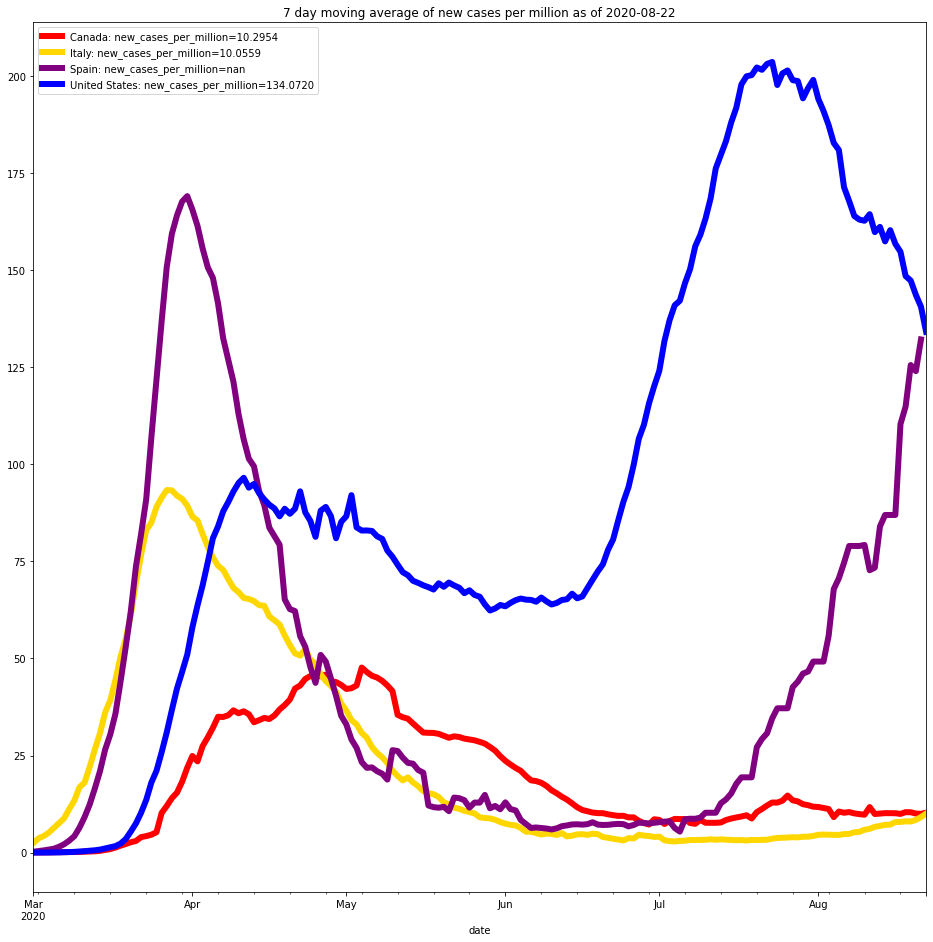

In [28]:
ma_win = 7
us_nc_fig = world.plot_var("new_cases_per_million", 
                           'Spain', 'United States','Canada', 'Italy',
                           ma_window=ma_win,
    figsize=(16,16),
    #log_scale=True,
    date_start="2020-03-01",
    date_end=as_of,
    colours={'Spain': 'purple', 'United States': 'blue', 'Canada': 'red', 'Italy': 'gold'},
    lw=6,
    title=f"{ma_win} day moving average of new cases per million as of {as_of}"  
)

savefile = f"{as_of}_US_CAN_NC_{ma_win}-Day_MA.png"
plt.savefig(Path.home().joinpath("Downloads/" + savefile),
           format="png")

plt.show()

In [29]:
world.df.loc[world.df["location"].apply(lambda loc: "spain" in loc.lower())]

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
32458,ESP,Europe,Spain,2019-12-31,0.0,0.0,NaN,0.0,0.0,NaN,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32459,ESP,Europe,Spain,2020-01-01,0.0,0.0,NaN,0.0,0.0,NaN,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32460,ESP,Europe,Spain,2020-01-02,0.0,0.0,NaN,0.0,0.0,NaN,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32461,ESP,Europe,Spain,2020-01-03,0.0,0.0,NaN,0.0,0.0,NaN,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32462,ESP,Europe,Spain,2020-01-04,0.0,0.0,NaN,0.0,0.0,NaN,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32688,ESP,Europe,Spain,2020-08-17,359082.0,16269.0,5157.429,28646.0,29.0,10.000,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32689,ESP,Europe,Spain,2020-08-18,364196.0,5114.0,5369.143,28670.0,24.0,12.714,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32690,ESP,Europe,Spain,2020-08-19,370867.0,6671.0,5869.000,28797.0,127.0,31.143,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56
32691,ESP,Europe,Spain,2020-08-20,377906.0,7039.0,5796.000,28813.0,16.0,29.714,...,13.799,34272.36,1.0,99.403,7.17,27.4,31.4,NaN,2.97,83.56


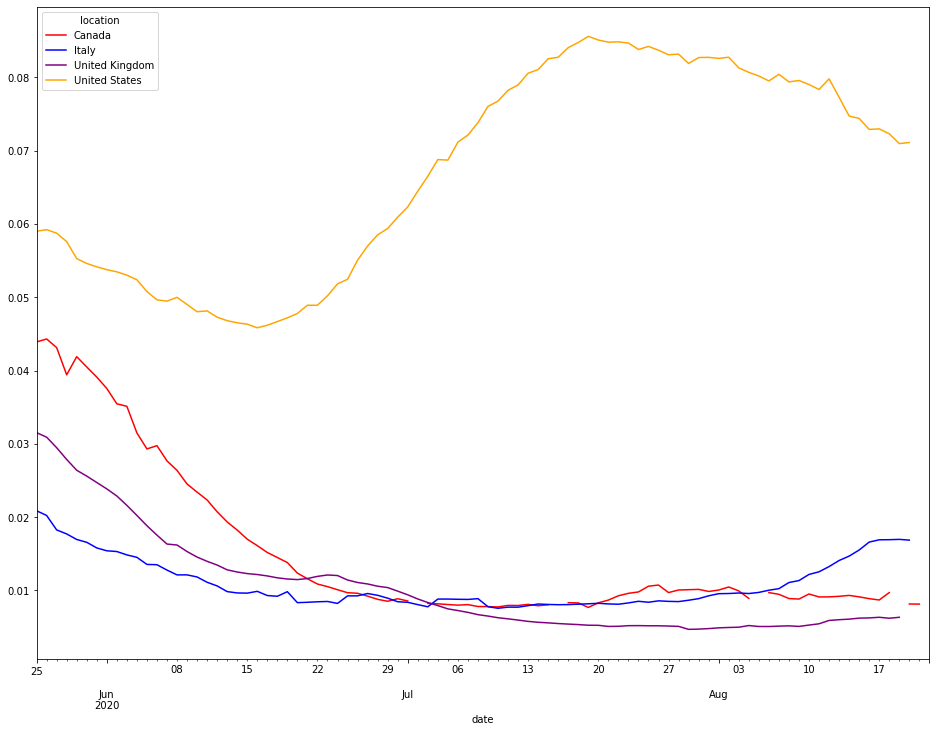

In [30]:
# Plot the positive test rate over the last ma_win days
ma_win = 14
locations = ['Canada', 'United States', 'United Kingdom', 'Italy']

world_pt_rate = world.pos_test_rate(ma_win, *locations, )

world_pt_rate[-90:].plot(figsize=(16,12),color=["red", "blue", 'purple', 'orange'])

savefile = f"{as_of}_US_CAN_PT_rate.png"
plt.savefig(Path.home().joinpath("Downloads/" + savefile),
           format="png")